<a href="https://colab.research.google.com/github/Saikat-too/ML_Diabetes_Prediction/blob/main/ML_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Exploratory Data Analysis

In [ ]:
#Installation of required libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")

In [ ]:
#Reading the dataset
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
# The first 5 observation units of the data set were accessed.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# The size of the data set was examined. It consists of 768 observation units and 9 variables.
df.shape

(768, 9)

In [ ]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Descriptive statistics of the data set accessed.
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [ ]:
# The distribution of the Outcome variable was examined.
df["Outcome"].value_counts()*100/len(df)

,count
Outcome,
0,65.104167
1,34.895833


In [ ]:
# The classes of the outcome variable were examined.
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


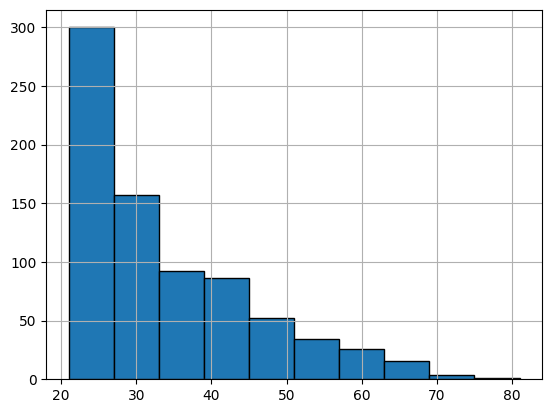

In [ ]:
# The histagram of the Age variable was reached.
df["Age"].hist(edgecolor = "black");

In [ ]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 81 Min Age: 21


<Axes: xlabel='BMI', ylabel='Density'>

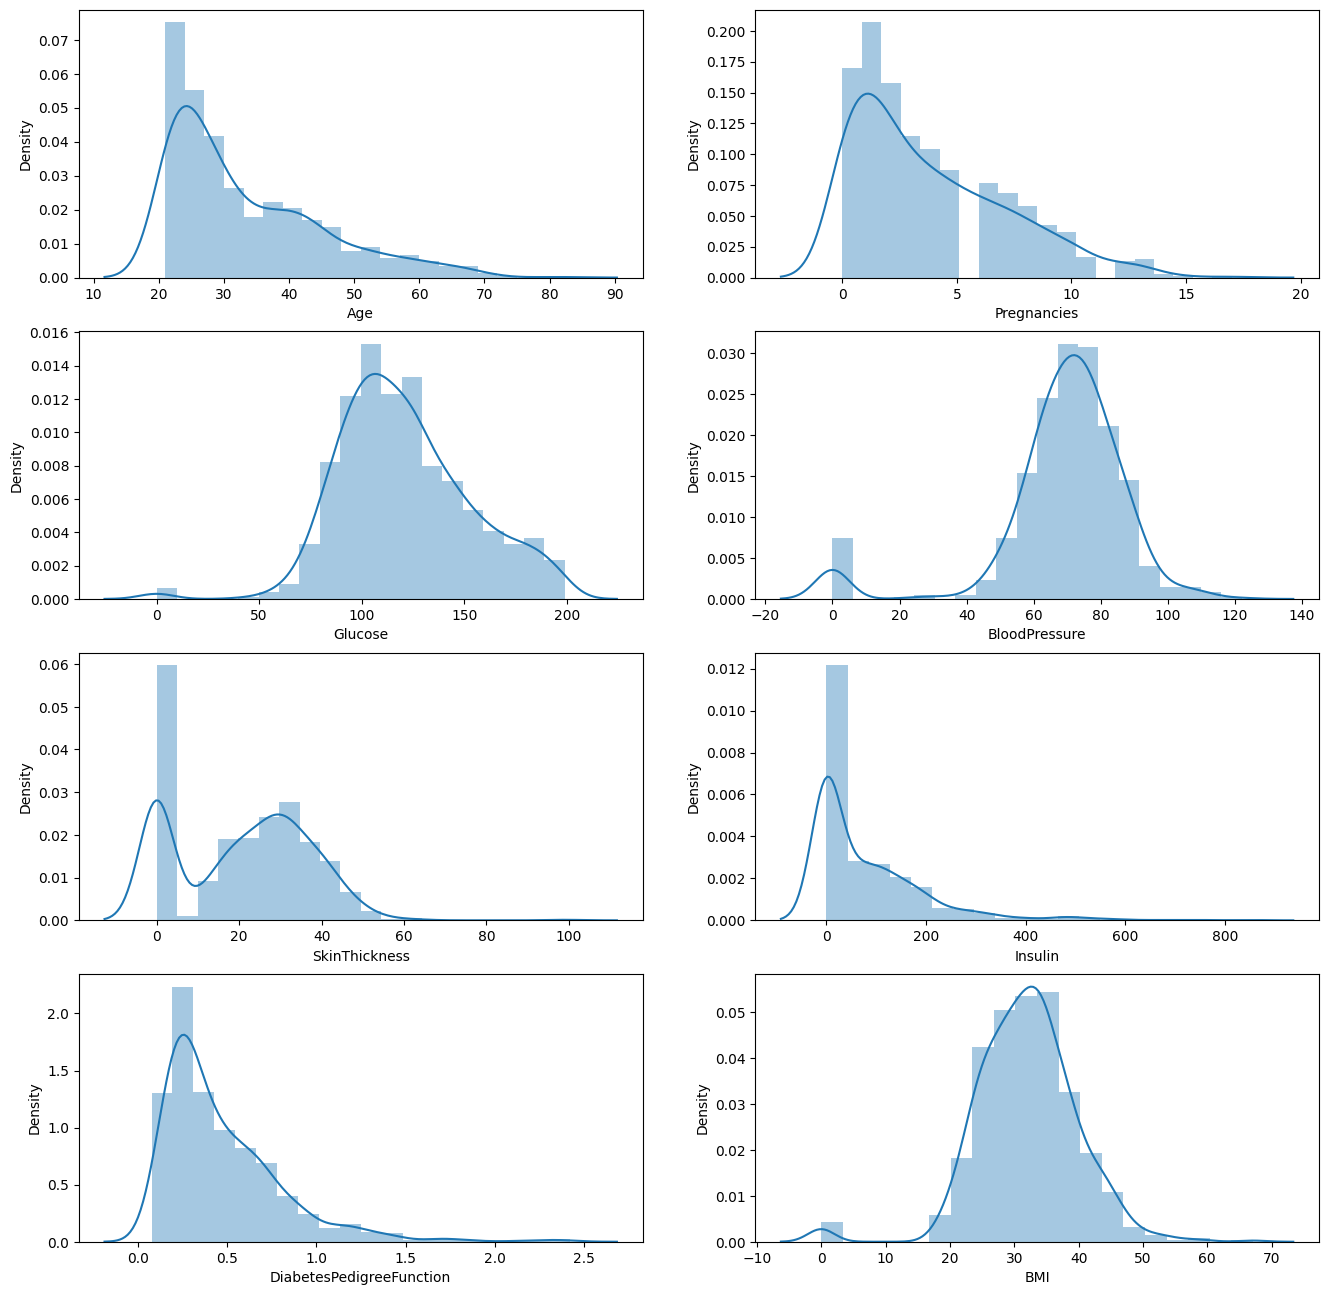

In [ ]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0])
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1])
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0])
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1])
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.distplot(df.BMI, bins = 20, ax=ax[3,1])

In [ ]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [ ]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [ ]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [ ]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [ ]:
df.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [ ]:
df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [ ]:

df.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [ ]:
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


In [ ]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables.
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases.
# When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
# These variables are Glucose. As these increase, Outcome variable increases.
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


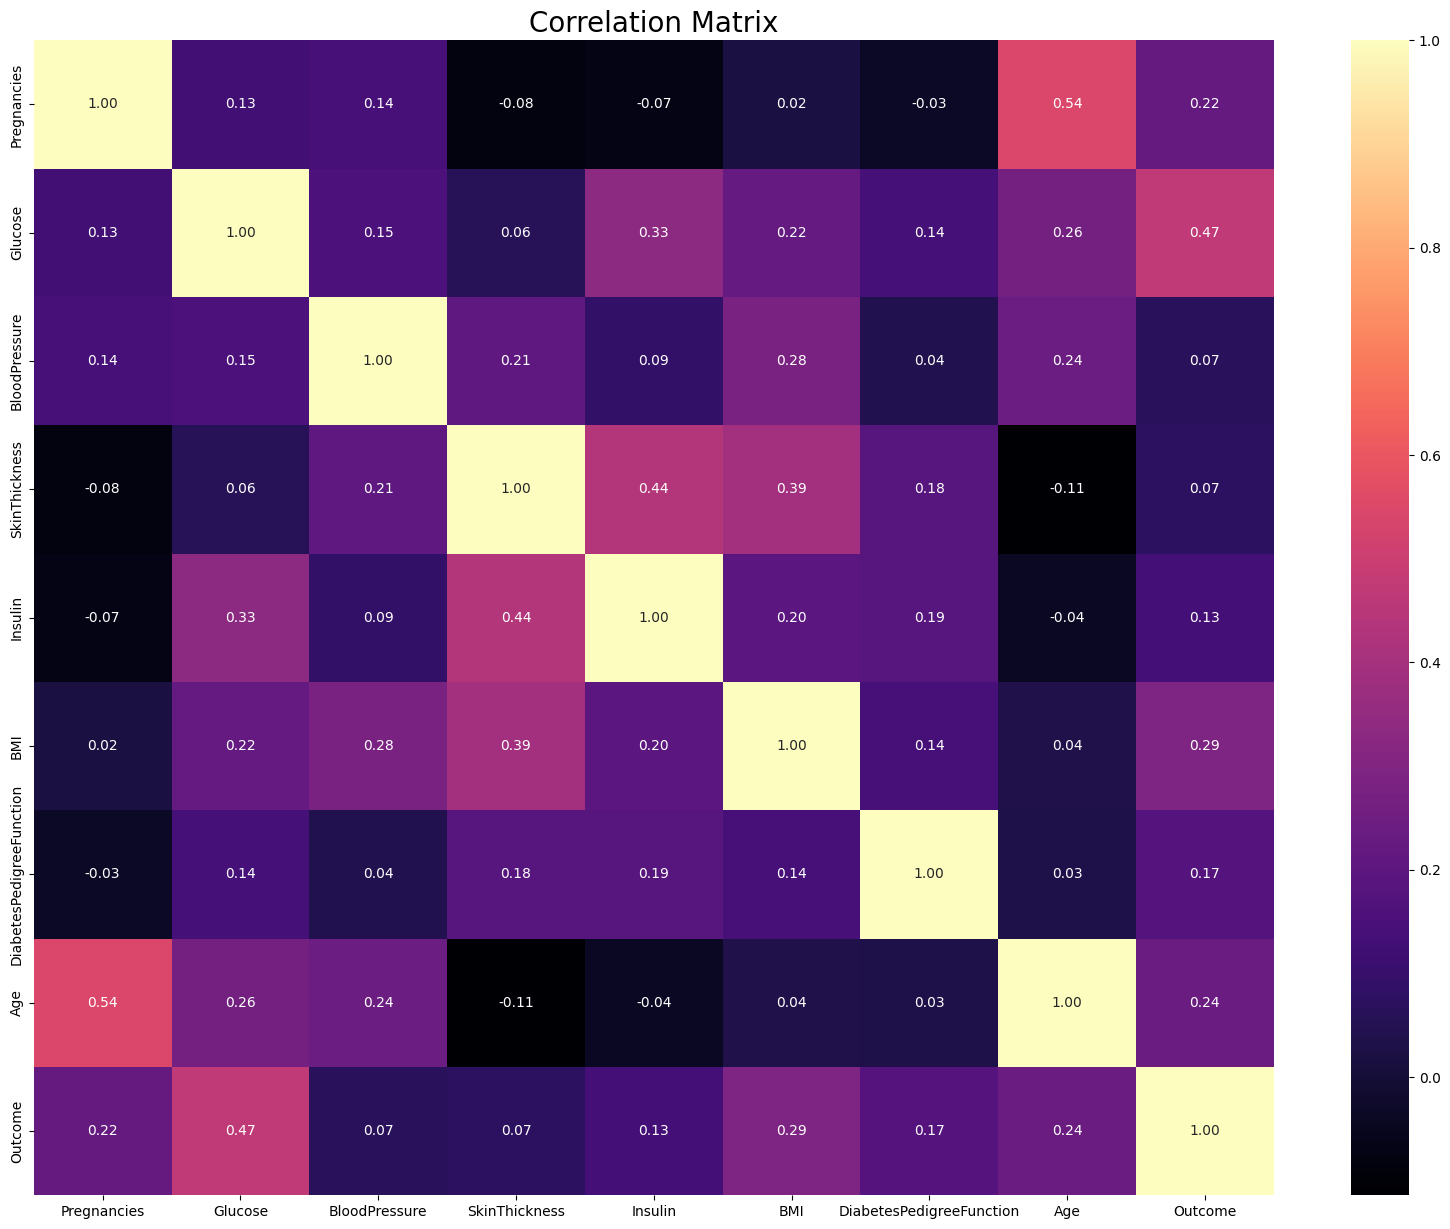

In [ ]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# 2) Data Preprocessing

## 2.1) Missing Observation Analysis

We saw on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN:

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# Now, we can look at where are missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


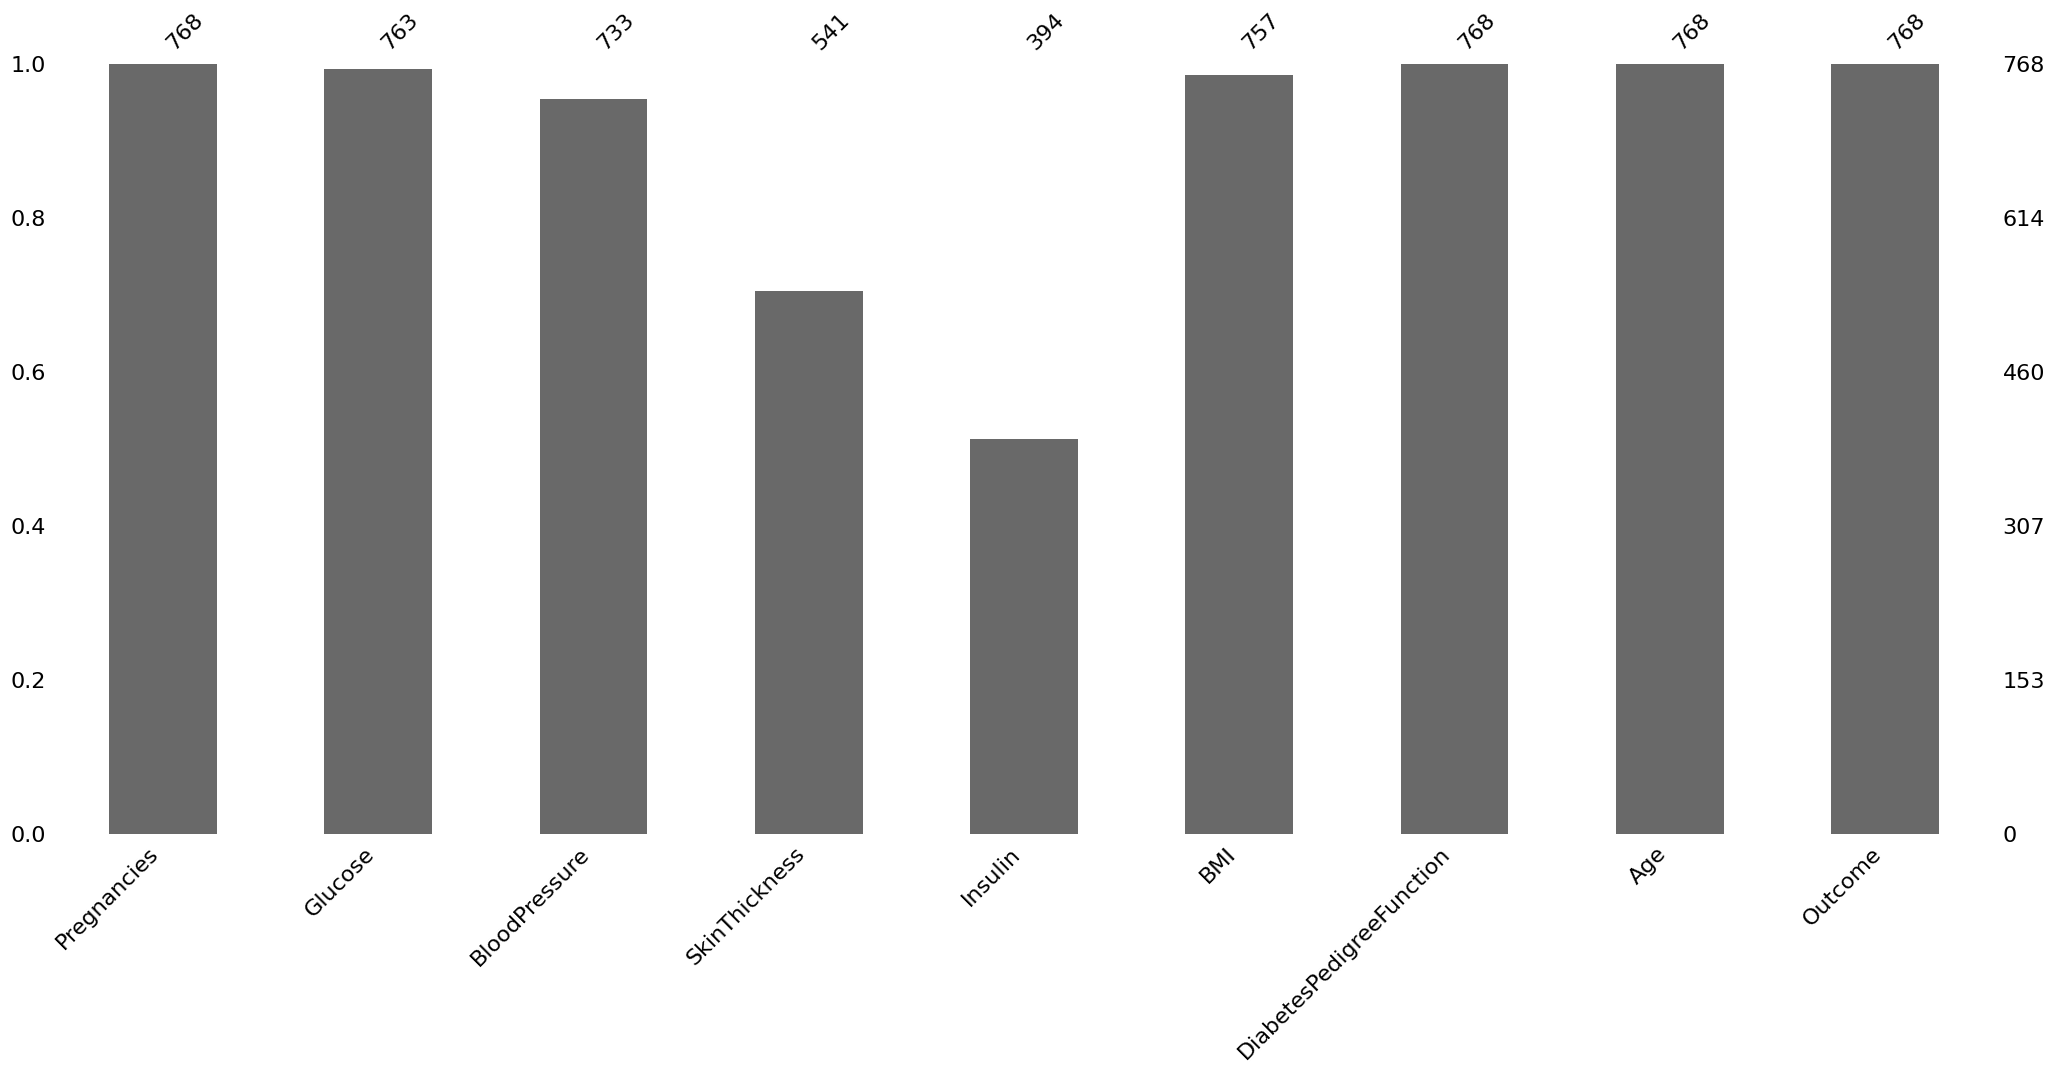

In [ ]:
# Have been visualized using the missingno library for the visualization of missing observations.
# Plotting
import missingno as msno
msno.bar(df);

In [ ]:
# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# Missing values were filled.
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## 2.2) Outlier Observation Analysis

In [ ]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in df:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


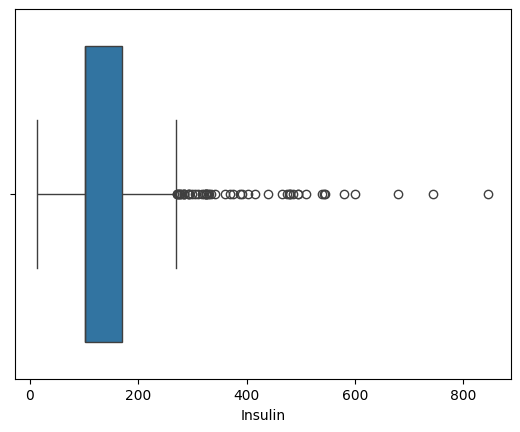

In [ ]:
# The process of visualizing the Insulin variable with boxplot method was done. We find the outlier observations on the chart.
import seaborn as sns
sns.boxplot(x = df["Insulin"]);

In [ ]:
#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

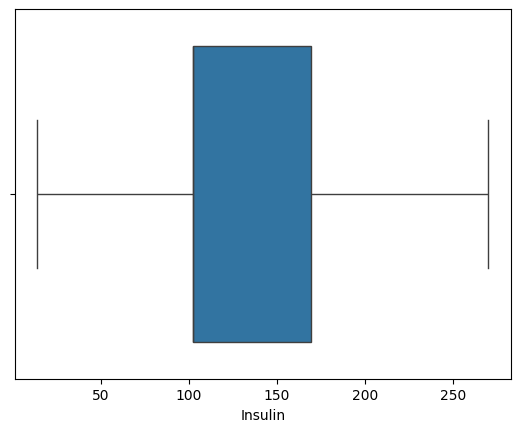

In [ ]:
import seaborn as sns
sns.boxplot(x = df["Insulin"]);

## 2.3)  Local Outlier Factor (LOF)

In [ ]:
# We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [ ]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.05893469, -2.37289269, -2.15297995, -2.09708735, -2.0772561 ,
       -1.95255968, -1.86384019, -1.74003158, -1.72703492, -1.71674689,
       -1.70343883, -1.6688722 , -1.64296768, -1.64190437, -1.61620872,
       -1.61369917, -1.60057603, -1.5988774 , -1.59608032, -1.57027568,
       -1.55876022, -1.55674614, -1.51852389, -1.50843907, -1.50280943,
       -1.50160698, -1.48391514, -1.4752983 , -1.4713427 , -1.47006248])

In [ ]:
#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

np.float64(-1.740031580305444)

In [ ]:
#We delete those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [ ]:
# The size of the data set was examined.
df.shape

(760, 9)

# 3) Feature Engineering

Creating new variables is important for models. But you need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [ ]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [ ]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [ ]:
# The operation performed was added to the dataframe.
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [ ]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


# 4) One Hot Encoding

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [ ]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,True,False,False,False,False,False,False,False,False,True
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,False,False,True,False,True,False,True,False,False
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,False,False,False,False,False,False,False,False,False,True
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,False,False,True,False,True,False,True,False,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False,True


In [ ]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [ ]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,True,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,True,False,True,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True


In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [ ]:
# The variables in the data set are an effective factor in increasing the performance of the models by standardization.
# There are multiple standardization methods. These are methods such as" Normalize"," MinMax"," Robust" and "Scale".
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294
1,-0.4,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647
2,1.0,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471
3,-0.4,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588
4,-0.6,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294


In [ ]:
X = pd.concat([X,categorical_df], axis = 1)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.6,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294,True,False,False,False,False,False,False,False,False,True
1,-0.4,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647,False,False,False,True,False,True,False,True,False,False
2,1.0,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471,False,False,False,False,False,False,False,False,False,True
3,-0.4,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588,False,False,False,True,False,True,False,True,False,False
4,-0.6,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294,False,False,True,False,False,False,False,False,False,True


In [ ]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


# 5) Base Models

In [ ]:
# Validation scores of all base models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd


models = []
models.append(('LinearRegression' , LinearRegression()))
models.append(('LogisticRegression', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = 12345)))
models.append(('RandomForest', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
# models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

LinearRegression: nan (nan)
LogisticRegression: 0.848684 (0.036866)
KNN: 0.840789 (0.023866)
DecisionTreeClassifier: 0.857895 (0.024826)
RandomForest: 0.881579 (0.026316)
SVM: 0.853947 (0.036488)
XGB: 0.890789 (0.020427)


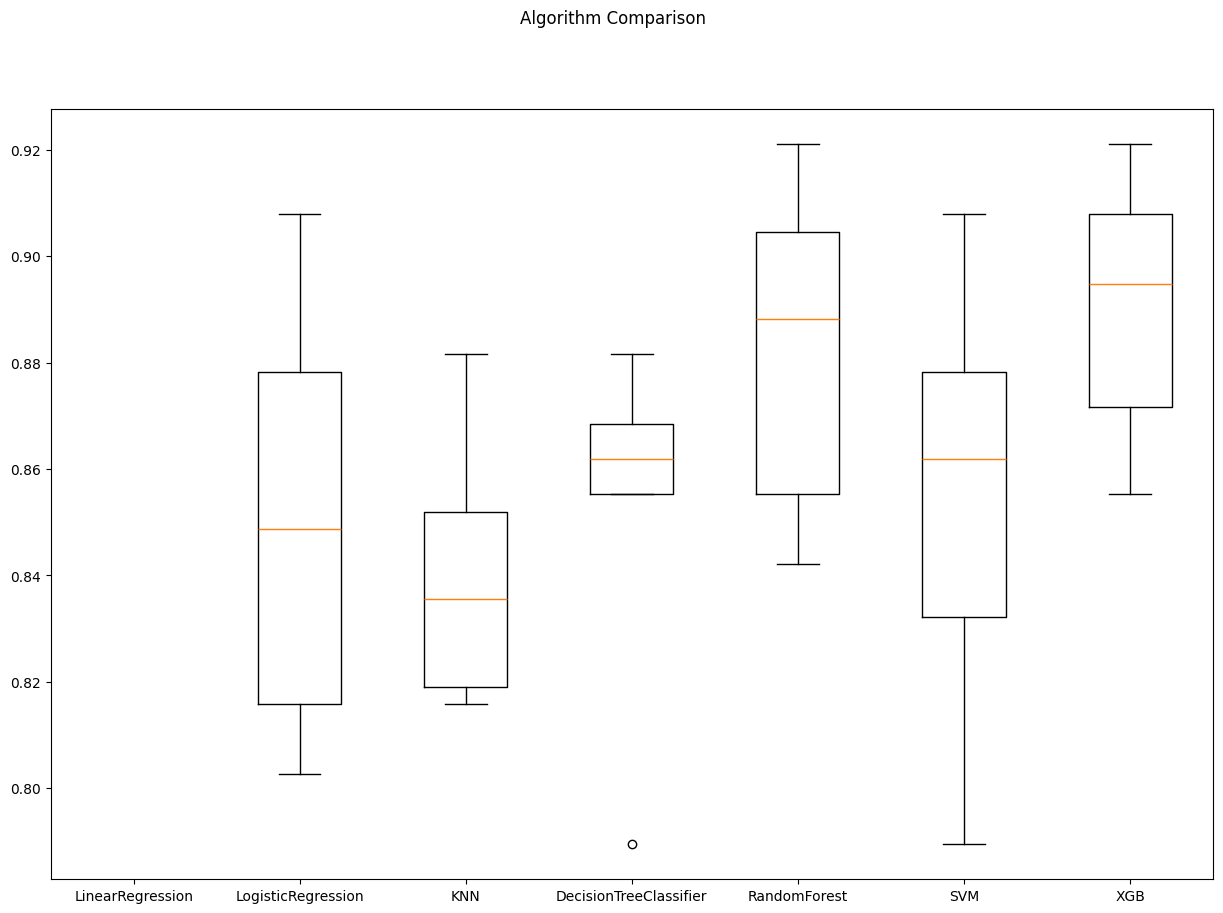

In [ ]:
for name, model in models:

        kfold = KFold(n_splits = 10)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 6) Model Tuning

 XGBoost Tuning

In [ ]:
xgb = GradientBoostingClassifier(random_state = 12345)

In [ ]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [ ]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


In [ ]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': np.float64(0.1),
 'n_estimators': 100,
 'subsample': 1.0}

### 3.1) Final Model Installation

In [ ]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X,y)

In [ ]:
cross_val_score(xgb_tuned, X, y, cv = 10).mean()

np.float64(0.9013157894736843)